![poster](./data/3.유동인구.png)

## 유동인구와 상권의 상관관계

**<3. 유동인구와 상권의 상관관계>**
1. https://sg.sbiz.or.kr/godo/index.sg
    유동인구 csv
2. https://www.data.go.kr/data/15041102/fileData.do
    대구 지하철역 csv
3. https://www.data.go.kr/data/15083033/fileData.do
    소상공인 상권정보 csv

## 문제정의
- 유동인구가 많은 지역을 찾아라(구 또는 동 수준)
- 교통시설(버스 정류장, 지하철 역) 주변의 유동인구를 비교분석하라.

### 문제분석
- 문제에서 제시한 시설 주변의 상권들의 특징을 파악해야 한다.
- 주어진 시간이 적으므로 시간 집약적인 방법을 택한다.
  
## 문제해결 방법
- 대표적인 샘플을 골라 데이터를 수집하고 분석한다.
- 유동인구를 먼저 파악하고 점진적으로 추가적인 데이터를 분석한다.
  - 동시에 데이터를 조합하여 유의미한 상관관계를 찾는다.


<br>

# 시작하기❕

In [1]:
# import libs
from libs import *
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns

# get fonts
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()

### 대구의 시간별 유동인구 데이터 🚶🚶‍♀️

In [2]:
# 작업을 간소화하기 위해 함수 사용
df_traffic:pd.DataFrame = get_dataframe('foot_traffic','대구_시간별.csv')

In [3]:
df_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구이름      139 non-null    object
 1   동이름      139 non-null    object
 2   00-06시   139 non-null    int64 
 3   06-11시   139 non-null    int64 
 4   11시-14시  139 non-null    int64 
 5   14시-17시  139 non-null    int64 
 6   17시-21시  139 non-null    int64 
 7   21시-24시  139 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 8.8+ KB


In [4]:
df_traffic.head(6)

,구이름,동이름,00-06시,06-11시,11시-14시,14시-17시,17시-21시,21시-24시
0,동구,공산동,255,1712,1889,2141,2281,652
1,동구,도평동,197,1591,1492,1373,1326,339
2,동구,동촌동,371,926,667,675,919,412
3,동구,방촌동,5247,16292,13219,14170,18182,7123
4,동구,불로·봉무동,3835,14652,12919,12940,12947,3922
5,동구,신암1동,1247,4477,3333,3566,4780,1956


## ⚠ 문제제기
- 세부 동에 대한 데이터를 가지고 있기 때문에, 전반적인 유동인구 파악이 어렵다.
   - 유동인구에 따른 창업 가이드라인을 제시해주기 위해 데이터를 전처리 해야한다.

In [5]:
# 행정구역 데이터 확인
print('{}\n'.format(df_traffic['구이름'].unique()))
print('{}\n'.format(df_traffic['동이름'].unique()))

['동구' '북구' '수성구' '중구' '서구' '남구' '달서구' '달성군']

['공산동' '도평동' '동촌동' '방촌동' '불로·봉무동' '신암1동' '신암2동' '신암3동' '신암4동' '신암5동 '
 '신천1·2동' '신천3동' '신천4동' '안심1동' '안심2동' '안심3·4동' '지저동' '해안동' '효목1동' '효목2동'
 '검단동' '고성동' '관문동' '관음동' '구암동' '국우동' '노원동' '대현동' '동천동' '무태조야동' '복현1동'
 '복현2동' '산격1동' '산격2동' '산격3동' '산격4동' '읍내동' '칠성동' '침산1동' '침산2동' '침산3동'
 '태전1동' '태전2동' '고산1동' '고산2동' '고산3동' '두산동' '만촌1동' '만촌2동' '만촌3동' '범물1동'
 '범물2동' '범어1동' '범어2동' '범어3동' '범어4동' '상동' '수성1가동' '수성2·3가동' '수성4가동' '중동'
 '지산1동' '지산2동' '파동' '황금1동' '황금2동' '남산1동' '남산2동' '남산3동' '남산4동' '대봉1동'
 '대봉2동' '대신동' '동인동' '삼덕동' '성내1동' '성내2동' '성내3동' '내당1동' '내당2·3동' '내당4동'
 '비산1동' '비산2·3동' '비산4동' '비산5동' '비산6동' '비산7동' '평리1동' '평리2동' '평리3동' '평리4동'
 '평리5동' '평리6동' '상중이동' '원대동' '이천동' '봉덕1동' '봉덕2동' '봉덕3동' '대명1동' '대명2동'
 '대명3동' '대명4동' '대명5동' '대명6동' '대명9동' '대명10동' '대명11동' '성당동' '두류1·2동' '두류3동'
 '본리동' '감삼동' '죽전동' '장기동' '용산1동' '용산2동' '이곡1동' '이곡2동' '신당동' '월성1동' '월성2동'
 '진천동' '상인1동' '상인2동' '상인3동' '도원동' '송현1동' '송현2동' '본 동' '화원읍' '논공읍' '다사읍'
 '유가읍' '옥포읍' '현풍읍' '가창면' '하빈면'

In [6]:
# 대구 데이터만 추출
daegu = df_traffic.loc[df_traffic['구이름'] != '달성군',:]

# check
print('구 이름 : {}\n'.format(daegu['구이름'].unique()))

구 이름 : ['동구' '북구' '수성구' '중구' '서구' '남구' '달서구']



### 시간대⏲ 데이터 추출

In [7]:
# melting in timeline
df_district = daegu.drop(columns=['구이름']
                         ).groupby(by=['동이름']
                                   ).sum().reset_index()
df_district_melted = df_district.melt(
    id_vars=['동이름'],
    var_name='시간대',
    value_name='인원수'
    ).sort_values(['동이름','시간대'])

# check
df_district_melted

,동이름,시간대,인원수
0,감삼동,00-06시,3237
130,감삼동,06-11시,14057
260,감삼동,11시-14시,10005
390,감삼동,14시-17시,11480
520,감삼동,17시-21시,16893
...,...,...,...
259,효목2동,06-11시,9704
389,효목2동,11시-14시,7849
519,효목2동,14시-17시,8915
649,효목2동,17시-21시,11382


<b>데이터 전처리</b>
를 통해 행정구역을 통합하고 우리가 원하는 데이터를 추출할 수 있도록 하자

In [8]:
# 고유한 값 재확인
df_district_melted['동이름'].unique()

array(['감삼동', '검단동', '고산1동', '고산2동', '고산3동', '고성동', '공산동', '관문동', '관음동',
       '구암동', '국우동', '남산1동', '남산2동', '남산3동', '남산4동', '내당1동', '내당2·3동',
       '내당4동', '노원동', '대명10동', '대명11동', '대명1동', '대명2동', '대명3동', '대명4동',
       '대명5동', '대명6동', '대명9동', '대봉1동', '대봉2동', '대신동', '대현동', '도원동', '도평동',
       '동인동', '동천동', '동촌동', '두류1·2동', '두류3동', '두산동', '만촌1동', '만촌2동',
       '만촌3동', '무태조야동', '방촌동', '범물1동', '범물2동', '범어1동', '범어2동', '범어3동',
       '범어4동', '복현1동', '복현2동', '본 동', '본리동', '봉덕1동', '봉덕2동', '봉덕3동',
       '불로·봉무동', '비산1동', '비산2·3동', '비산4동', '비산5동', '비산6동', '비산7동', '산격1동',
       '산격2동', '산격3동', '산격4동', '삼덕동', '상동', '상인1동', '상인2동', '상인3동',
       '상중이동', '성내1동', '성내2동', '성내3동', '성당동', '송현1동', '송현2동', '수성1가동',
       '수성2·3가동', '수성4가동', '신당동', '신암1동', '신암2동', '신암3동', '신암4동', '신암5동 ',
       '신천1·2동', '신천3동', '신천4동', '안심1동', '안심2동', '안심3·4동', '용산1동', '용산2동',
       '원대동', '월성1동', '월성2동', '읍내동', '이곡1동', '이곡2동', '이천동', '장기동', '죽전동',
       '중동', '지산1동', '지산2동', '지저동', '진천동', '칠성동', '침산1동', '침산2

In [9]:
# 동 이름 합치기
df_district_melted['동이름'] = df_district_melted['동이름'].copy().str.replace(
    '(.*)[0-9](.*)',r'\1\2',regex=True
    ).replace(
        '(.*)[0-9](.*)',r'\1\2',regex=True
        ).replace(
            '(.*)·(.*)',r'\1\2',regex=True
            )

# check
print(sorted(df_district_melted['동이름'].unique()))

['감삼동', '검단동', '고산동', '고성동', '공산동', '관문동', '관음동', '구암동', '국우동', '남산동', '내당동', '노원동', '대명동', '대봉동', '대신동', '대현동', '도원동', '도평동', '동인동', '동천동', '동촌동', '두류동', '두산동', '만촌동', '무태조야동', '방촌동', '범물동', '범어동', '복현동', '본 동', '본리동', '봉덕동', '불로봉무동', '비산동', '산격동', '삼덕동', '상동', '상인동', '상중이동', '성내동', '성당동', '송현동', '수성가동', '신당동', '신암동', '신암동 ', '신천동', '안심동', '용산동', '원대동', '월성동', '읍내동', '이곡동', '이천동', '장기동', '죽전동', '중동', '지산동', '지저동', '진천동', '칠성동', '침산동', '태전동', '파동', '평리동', '해안동', '황금동', '효목동']


## 첫 번째 시각화📊
- 시간대별 상위 6개 '동'을 구한다.
- 이를 통해, 예측하거나 적용해볼 수 있는 상황을 추론해본다.
- bar 그래프를 적용한다.

C:\Users\kdh\miniconda3\envs\analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kdh\miniconda3\envs\analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kdh\miniconda3\envs\analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kdh\miniconda3\envs\analysis\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


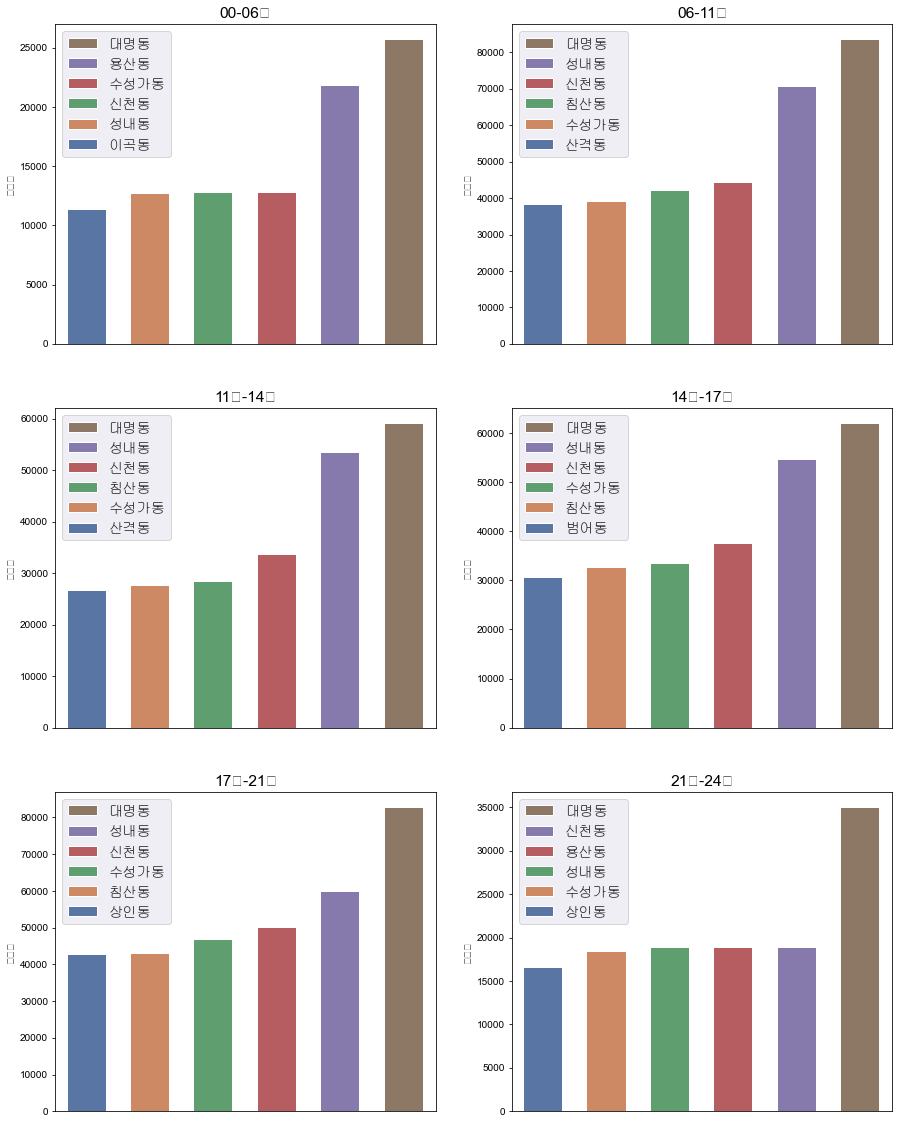

In [10]:
# 시간대 별 유동인구를 분석한다.
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15,20))
ax = [*ax[0],*ax[1],*ax[2]]

sns.set_style('ticks')
sns.set(font_scale = 1.3)
rc('font', family=font_name)

# 시간대 데이터 추출
times = df_district_melted['시간대'].unique()
for i,t in enumerate(times):
    df_by_times = df_district_melted[df_district_melted['시간대'] == t].groupby(
        by=['동이름','시간대']
        ).sum(
            ).reset_index(
            ).sort_values('인원수').tail(6)
    
    
    sns.barplot(ax=ax[i],data=df_by_times,x='동이름',y='인원수',hue='동이름')
    
    ax[i].set_title(f'{t}')
    ax[i].get_xaxis().set_visible(False)
    
    handles, labels = ax[i].get_legend_handles_labels()
    ax[i].legend(reversed(handles), reversed(labels), loc='upper left')
    
    # 모든 bar가 나오도록    
    b,t = ax[i].get_xlim()
    ax[i].set_xlim(b-0.1,t+0.7)
    
    # bar 크기 변환
    for p in ax[i].patches:
        p.set_width(0.7)

# 🔭 분석 
1. 유동인구는 <b>대명동</b>에서 모든 시간대에가 가장 많은 것으로 나타났다.
2. 그 외 06시부터 21시까지 <b>성내동</b>에서 두 번째로 가장 유동인구가 많은 것으로 나타났다.
   1. 유동인구를 바탕으로 창업할 지역을 추천하자면, 사람이 주로 활동하는 시간에 유동인구가 많은 대명동, 성내동, 신천동 등을 추천한다.

################################################################################################################################################

## 두 번째 시각화📊
- 전반적인 상황을 고려하여 시간대를 무시한 <b>유동인구</b>의 통계를 살펴본다.
- 이를 통해, 예측하거나 적용해볼 수 있는 상황을 추론해본다.
- bar 그래프를 적용한다.

<AxesSubplot:xlabel='동이름', ylabel='인원수'>

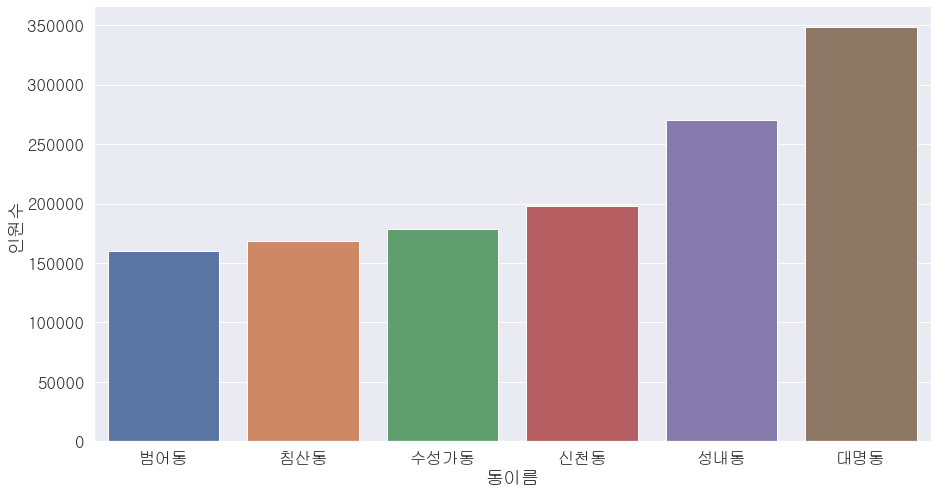

In [11]:
sns.set_style('dark')
sns.set(font_scale = 1.5)
rc('font', family=font_name)

plt.figure(figsize=(15,8))

this_barplot_data = df_district_melted.drop(columns=['시간대']).groupby(by='동이름').sum().reset_index().sort_values('인원수')
this_barplot_options = {
    'data':this_barplot_data.tail(6),
    'x':'동이름',
    'y':'인원수'
}

sns.barplot(**this_barplot_options)

# 🔬분석 
1. 첫 번째 시각화의 분석 결과와 비교해서 가장 많은 그리고 차순의 동이름은 같았으나, 그 이후의 순위는 달랐음을 알 수 있었다.
2. 하지만, 유동인구가 가장 많은 동과 나머지 동과의 차이는 분명하다.
   1. 유동인구를 고려하자면 상위 3위 이내로 선택하는 것이 좋을 것이다.

################################################################################################################################################

## 세 번째 시각화🥧
- 두 번째 시각화를 바탕으로 시간대별로 시각화해본다.
- 이를 통해, 예측하거나 적용해볼 수 있는 상황을 추론해본다.
- pie 그래프를 적용한다.

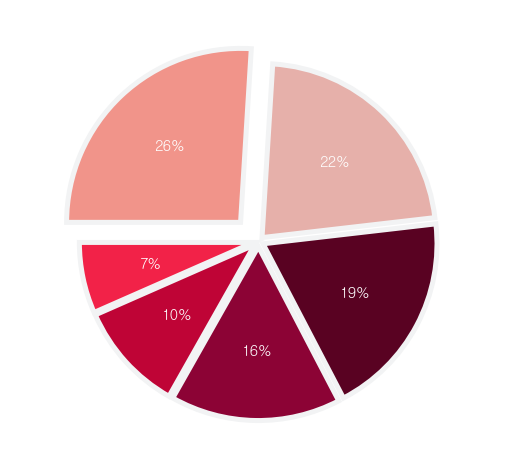

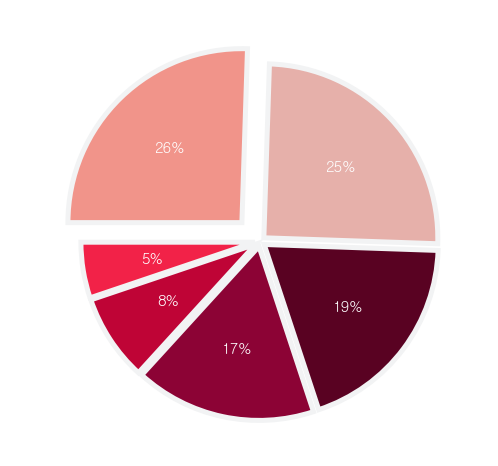

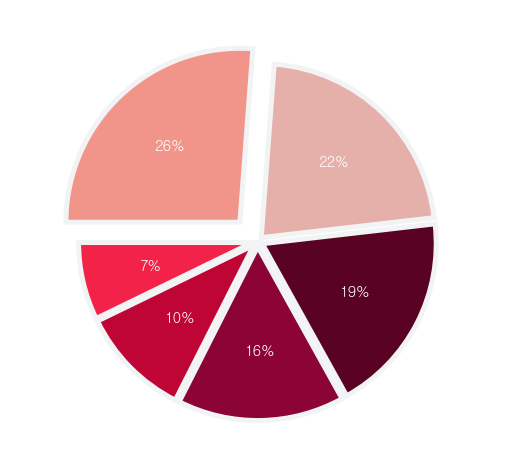

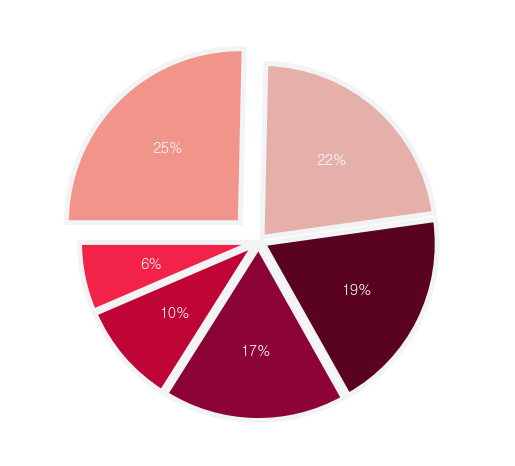

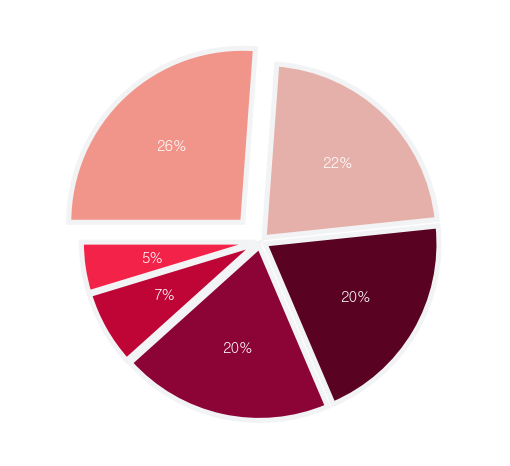

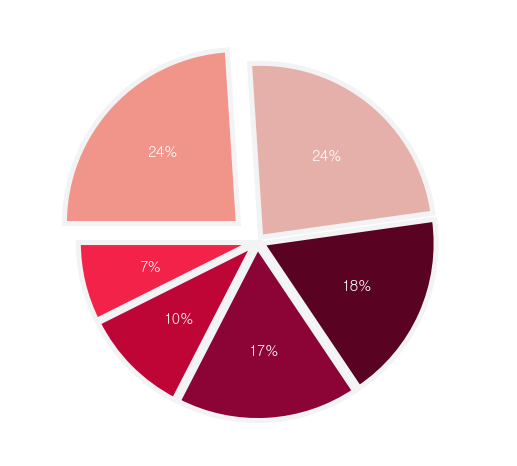

In [12]:
# 상위 유동인구의 동의 시간대별 유동인구의 분포를 파악한다.
district_names_top6 = this_barplot_options['data']['동이름']

temp_df = df_district_melted[df_district_melted['동이름'].isin(district_names_top6)].groupby(by=['동이름','시간대']).sum().reset_index()
temp_df

sns.set(font_scale=1.2,rc={'figure.facecolor':'None'})
rc('font', family=font_name)

plt.rcParams.update({'text.color': "white",})
for n in district_names_top6:
    this_df = temp_df[temp_df['동이름'] == n]
    
    # draw pie chart
    data = this_df['인원수'].sort_values(ascending=True)
    colors = ['#F22248','#BF0436', '#8C0335', '#590222','#E6B0AA','#F1948A']
    explode = [0.03,0.03,0.03,0.03,0.03,0.15]
    
    plt.figure(figsize=(15,8))
    plt.pie(data,labels = this_df['시간대'],autopct='%.0f%%',colors=colors,explode=explode,startangle=180,wedgeprops={
        'edgecolor':'#F2F3F4','linewidth':5
    },textprops={'fontsize': 15, 'fontweight':'bold'})
    
    plt.title(n)
    plt.show()


# ⚖분석
1. 아침과 새벽을 제외하고 나머지 시간대에 사람이 많다.
2. 특히 저녁시간과 오후 9시 ~ 12시 사이에 가장 많은 유동인구 비율을 갖는다.
3. 이를 바탕으로 낮에 할 수 있는 창업직종 보다는 <b>저녁~ 야간</b>에 할 수 있는 일을 추천할 수 있다.

################################################################################################################################################

## ⚠ 문제제기
- 교통과 엮어서 분석할 수 있는 정보가 부족하다.
- 지하철역이 있는 지역의 유동인구와의 연관성을 비교하기 위해 <b>지하철 역 정보</b>가 필요하다.
- 그리고 이를 정제한 데이터가 필요하다.

### 🚆대구 지하철 데이터 추출

In [13]:
# get data
df_daegu_subway = get_dataframe('subway','대구_지하철.csv')
df_daegu_subway

,철도운영기관명,선명,역명,지번주소,도로명주소
0,대구도시철도공사,1호선,각산,대구광역시 동구 신서동 627-15,대구광역시 동구 안심로 지하363(신서동)
1,대구도시철도공사,1호선,교대,대구광역시 남구 대명동 1982-11,대구광역시 남구 중앙대로 지하194(대명동)
2,대구도시철도공사,1호선,대곡(정부대구청사),대구광역시 달서구 대곡동 946,대구광역시 달서구 비슬로 지하2718(대곡동)
3,대구도시철도공사,1호선,대구역,대구광역시 북구 칠성동2가 302-305,대구광역시 북구 칠성남30길 지하24(칠성동)
4,대구도시철도공사,1호선,대명,대구광역시 남구 대명동 1291,대구광역시 남구 대명로 지하71(대명동)
...,...,...,...,...,...
86,대구도시철도공사,3호선,팔거(국립농관원/통계청),대구광역시 북구 동천동 960,대구광역시 북구 팔거천동로 226(동천동)
87,대구도시철도공사,3호선,팔달,대구광역시 북구 팔달동 76-3,대구광역시 북구 매천로2길 43(팔달동)
88,대구도시철도공사,3호선,팔달시장,대구광역시 북구 노원동3가 784-1,대구광역시 북구 팔달로 163-1(노원동3가)
89,대구도시철도공사,3호선,학정,대구광역시 북구 학정동 752-3,대구광역시 북구 팔거천동로 310(학정동)


In [14]:
# 동 이름으로 유동인구와 엮을 수 있도록 데이터를 전처리
df_daegu_subway_parsed = df_daegu_subway.copy()

# 필요없는 데이터 drop
df_daegu_subway_parsed.drop(columns=['철도운영기관명', '지번주소'],inplace=True)

cols = df_daegu_subway_parsed.columns.tolist()
cols[-1] = '동이름'

df_daegu_subway_parsed.columns = cols
df_daegu_subway_parsed.columns

Index(['선명', '역명', '동이름'], dtype='object')

In [15]:
# 지하철 역 데이터에서 동 이름 추출
district_temp = df_daegu_subway_parsed['동이름'].copy().map(lambda x :x.split('(').__len__())
indexs1 = district_temp[district_temp==1].index.tolist()
indexs2 = district_temp[district_temp==2].index.tolist()

df_daegu_subway_parsed['동이름'][indexs1] = df_daegu_subway_parsed['동이름'].copy()[indexs1].map(lambda x:x.split()[2])
df_daegu_subway_parsed['동이름'][indexs2] = df_daegu_subway_parsed['동이름'].copy()[indexs2].map(lambda x:x.split('(')[1].split(')')[0])

df_daegu_subway_parsed

,선명,역명,동이름
0,1호선,각산,신서동
1,1호선,교대,대명동
2,1호선,대곡(정부대구청사),대곡동
3,1호선,대구역,칠성동
4,1호선,대명,대명동
...,...,...,...
86,3호선,팔거(국립농관원/통계청),동천동
87,3호선,팔달,팔달동
88,3호선,팔달시장,노원동3가
89,3호선,학정,학정동


## ⚠ 추가 문제제기
- 지하철역의 동이름과 유동인구 데이터의 동이름이 서로 일치하지 않아 전처리가 필요함

In [16]:
temp = this_barplot_data['동이름'].copy().str.replace(
    '(.*)[1-9](.*)',r'\1\2',regex=True
    ).replace(
        '(.*)[1-9](.*)',r'\1\2',regex=True
        ).replace(
            '(.*)·(.*)',r'\1\2',regex=True
            )
        
this_barplot_data['동이름'] = temp
this_barplot_data['동이름']

5      관문동
20     동촌동
65     해안동
8      국우동
54     장기동
      ... 
61     침산동
42    수성가동
46     신천동
39     성내동
12     대명동
Name: 동이름, Length: 68, dtype: object

## 문제
- left outer join 후 left보다 더 긴 row가 생겨남

## 해결
- 중복되는 값을 제거함

In [17]:
print(sorted(this_barplot_data['동이름'].unique()))
print(this_barplot_data)
print(df_daegu_subway_parsed['동이름'].unique())
print(df_daegu_subway_parsed)

['감삼동', '검단동', '고산동', '고성동', '공산동', '관문동', '관음동', '구암동', '국우동', '남산동', '내당동', '노원동', '대명동', '대봉동', '대신동', '대현동', '도원동', '도평동', '동인동', '동천동', '동촌동', '두류동', '두산동', '만촌동', '무태조야동', '방촌동', '범물동', '범어동', '복현동', '본 동', '본리동', '봉덕동', '불로봉무동', '비산동', '산격동', '삼덕동', '상동', '상인동', '상중이동', '성내동', '성당동', '송현동', '수성가동', '신당동', '신암동', '신암동 ', '신천동', '안심동', '용산동', '원대동', '월성동', '읍내동', '이곡동', '이천동', '장기동', '죽전동', '중동', '지산동', '지저동', '진천동', '칠성동', '침산동', '태전동', '파동', '평리동', '해안동', '황금동', '효목동']
     동이름     인원수
5    관문동    3478
20   동촌동    3970
65   해안동    3977
8    국우동    5546
54   장기동    5998
..   ...     ...
61   침산동  168861
42  수성가동  178625
46   신천동  197610
39   성내동  270691
12   대명동  348445

[68 rows x 2 columns]
['신서동' '대명동' '대곡동' '칠성동' '신천동' '검사동' '남산동' '동호동' '덕산동' '방촌동' '상인동' '화원읍'
 '송현동' '신기동' '신암동' '괴전동' '용계동' '진천동' '율하동' '남일동' '감삼동' '호산동' '삼덕동2가' '신당동'
 '시지동' '내당동' '다사읍' '만촌동' '연호동' '수성동' '두류동' '범어동' '신매동' '이곡동' '동산동' '매호동'
 '대동' '용산동' '중방동' '정평동' '죽전동' '이천동' '비산동' '구암동' '수창동' '동천동' '노원동3가' '매천

In [18]:
# 중복된 값을 제거
df_no_duplicated = df_daegu_subway_parsed.drop_duplicates(subset=['동이름']).sort_values('동이름')
df_no_duplicated.head(6)

,선명,역명,동이름
32,2호선,감삼,감삼동
6,1호선,동촌,검사동
18,1호선,안심(혁신도시·첨복단지),괴전동
63,3호선,구암,구암동
7,1호선,명덕(2.28민주운동기념회관),남산동
25,1호선,중앙로,남일동


In [19]:
# merging data
merged = pd.merge(
    left=this_barplot_data.groupby(by='동이름').sum().reset_index(),
    right=df_no_duplicated,
    how='left',
    on='동이름'
    )

merged = merged[~merged['역명'].isna()]
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 66
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   동이름     28 non-null     object
 1   인원수     28 non-null     int64 
 2   선명      28 non-null     object
 3   역명      28 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


In [20]:
# check
merged.head(5)

,동이름,인원수,선명,역명
0,감삼동,61756,2호선,감삼
7,구암동,11497,3호선,구암
9,남산동,148547,1호선,명덕(2.28민주운동기념회관)
10,내당동,102185,2호선,내당
12,대명동,348445,1호선,교대


## 네 번째 시각화🍫
- 지하철역이 있는 행정구역의 유동인구를 시각화한다.
- 두 번째 시각화 자료와 비교한다.
- 이를 통해, 예측하거나 적용해볼 수 있는 상황을 추론해본다.
- bar 그래프를 적용한다.

<AxesSubplot:xlabel='동이름', ylabel='인원수'>

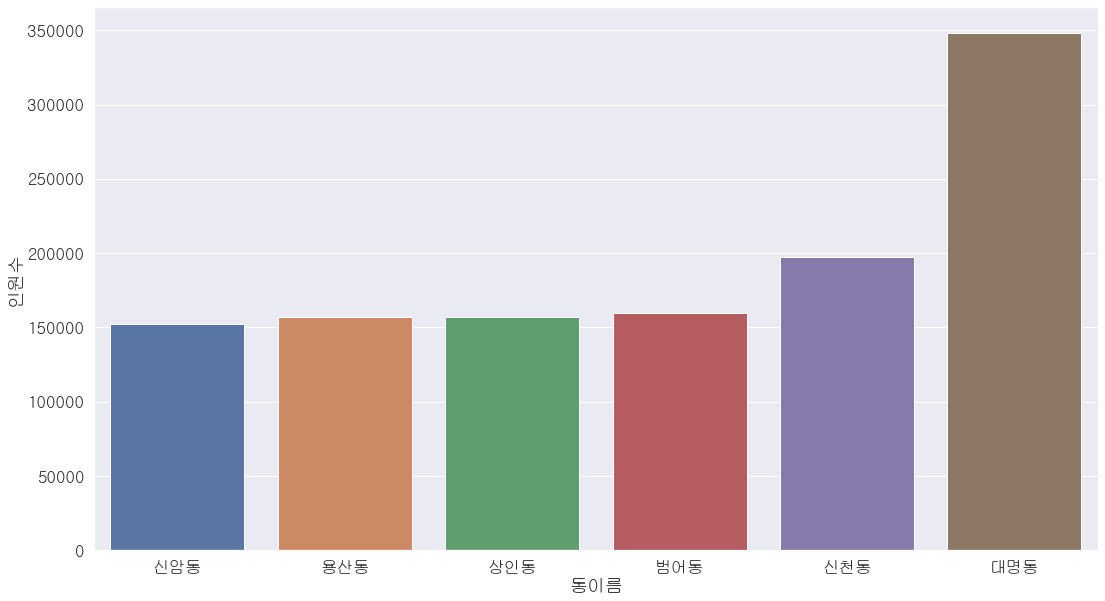

In [21]:
sns.set_style('dark')
sns.set(font_scale = 1.5)
rc('font', family=font_name)

plt.figure(figsize=(18,10))

this_barplot_options_merged = {
    'data':merged.sort_values('인원수').tail(6),
    'x':'동이름',
    'y':'인원수'
}
# 여러 동을 합쳤기 때문에 이전의 그래프와 차이가 있다.
sns.barplot(**this_barplot_options_merged)

In [22]:
store = get_dataframe('store_info','대구.csv')

store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96372 entries, 0 to 96371
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     96372 non-null  int64  
 1   상호명        96372 non-null  object 
 2   지점명        14764 non-null  object 
 3   상권업종대분류코드  96372 non-null  object 
 4   상권업종대분류명   96372 non-null  object 
 5   상권업종중분류코드  96372 non-null  object 
 6   상권업종중분류명   96372 non-null  object 
 7   상권업종소분류코드  96372 non-null  object 
 8   상권업종소분류명   96372 non-null  object 
 9   표준산업분류코드   90503 non-null  object 
 10  표준산업분류명    90503 non-null  object 
 11  시도코드       96372 non-null  int64  
 12  시도명        96372 non-null  object 
 13  시군구코드      96372 non-null  int64  
 14  시군구명       96372 non-null  object 
 15  행정동코드      96372 non-null  int64  
 16  행정동명       96364 non-null  object 
 17  법정동코드      96368 non-null  float64
 18  법정동명       96368 non-null  object 
 19  지번코드       96372 non-null  int64  
 20  대지구분코드

C:\Users\kdh\AppData\Local\Temp/ipykernel_5432/1273852910.py:1: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  store = get_dataframe('store_info','대구.csv')


In [23]:
store.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,20547760,옛날포장마차,NaN,Q,음식,Q09,유흥주점,Q09A02,소주방/포장마차,I56219,...,2717010200113270001025963,NaN,대구광역시 서구 달서천로41길 22,703040,41723.0,NaN,NaN,NaN,128.558109,35.884908
1,23801062,으뜸전산컴퓨터,NaN,D,소매,D08,사무/문구/컴퓨터,D08A03,컴퓨터/사무용기기종합,G47311,...,2729010200101500003022439,NaN,대구광역시 달서구 달구벌대로 1770,704060,42659.0,NaN,NaN,NaN,128.558718,35.858010
2,20549469,박가냉면,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2714011000110210000008286,문화아파트,대구광역시 동구 동촌로14길 14,701862,41155.0,NaN,1,NaN,128.649065,35.887930


In [24]:
# 필요한 데이터만 추출
store_col_index = [1,4,6,8,16,18,24,37,38]

preprocessed = store.iloc[:,store_col_index]

cond_first = preprocessed['상권업종대분류명'] == '음식'
cond_sec = ~preprocessed['행정동명'].isna()
cond_thd = ~preprocessed['법정동명'].isna()

food = preprocessed[cond_first&cond_sec&cond_thd]

food

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,행정동명,법정동명,지번주소,경도,위도
0,옛날포장마차,음식,유흥주점,소주방/포장마차,비산7동,비산동,대구광역시 서구 비산동 1327-1,128.558109,35.884908
2,박가냉면,음식,한식,한식/백반/한정식,동촌동,검사동,대구광역시 동구 검사동 1021,128.649065,35.887930
4,장충동왕족발,음식,한식,족발/보쌈전문,칠성동,칠성동2가,대구광역시 북구 칠성동2가 20-1,128.589799,35.885235
13,굽네치킨,음식,닭/오리요리,후라이드/양념치킨,지산2동,지산동,대구광역시 수성구 지산동 1272-2,128.633540,35.821523
20,닭S포차,음식,유흥주점,소주방/포장마차,비산2.3동,비산동,대구광역시 서구 비산동 504-15,128.571700,35.877309
...,...,...,...,...,...,...,...,...,...
96355,고기근본,음식,한식,갈비/삼겹살,신암2동,신암동,대구광역시 동구 신암동 1332-11,128.609621,35.877511
96364,빵을사랑하는사람들,음식,제과제빵떡케익,제과점,내당2.3동,내당동,대구광역시 서구 내당동 1005-1,128.575035,35.868416
96365,스트롤커피,음식,커피점/카페,커피전문점/카페/다방,대명2동,대명동,대구광역시 남구 대명동 1797-1,128.589790,35.851066
96369,제주본,음식,한식,갈비/삼겹살,두산동,두산동,대구광역시 수성구 두산동 660,128.622726,35.827005


In [25]:
# 동이름 전처리

district_adm = food['행정동명'].to_list()
district_law = food['법정동명'].to_list()

merged_district_name = []
for i,j in zip(district_adm,district_law):
    added = i if  len(i) <=len(j) else j
    merged_district_name.append(added)
    
merged_district_name = pd.Series(merged_district_name,name='동이름')

merged_district_name.unique()

array(['비산동', '동촌동', '칠성동', '지산동', '원대동', '해안동', '봉산동', '황금동', '두류동',
       '범물동', '두산동', '이곡동', '범어동', '삼덕동', '성내2동', '이천동', '가창면', '화원읍',
       '관문동', '구지면', '복현동', '대명동', '수성동2가', '신당동', '평리동', '논공읍', '덕산동',
       '동인동', '다사읍', '만촌동', '효목동', '본리동', '신천동', '율하동', '송현동', '대신동',
       '산격동', '대현동', '공산동', '상인동', '문화동', '동천동', '구암동', '동변동', '용산동',
       '읍내동', '신매동', '불로동', '중리동', '죽전동', '동문동', '신암동', '본동', '봉덕동',
       '수성동3가', '서변동', '현풍읍', '진천동', '내당동', '옥포읍', '교동', '봉무동', '상동',
       '유가읍', '동호동', '성당동', '도원동', '감삼동', '중동', '공평동', '월성동', '파동', '수창동',
       '시지동', '남산동', '장기동', '관음동', '태전동', '대흥동', '성내1동', '하빈면', '장동',
       '신기동', '노원동', '유가면', '옥포면', '방촌동', '혁신동', '대봉동', '매호동', '침산동',
       '수동', '고성동', '지저동', '향촌동', '수성4가동', '도동', '현풍면', '월암동', '검단동',
       '신서동', '남일동', '수성1가동', '국우동', '용계동', '대천동', '사일동', '대안동', '상리동',
       '동산동', '인교동', '전동', '포정동', '욱수동', '조야동', '성동', '달성동', '괴전동', '매여동',
       '성내3동', '남성로', '연경동', '연호동', '이현동', '서호동', '동일동', '상서동', '완전동',
     

In [26]:
food_n = food.drop(columns=['행정동명','법정동명'])
food_n.index = list(range(int(food_n.shape[0])))

df_food = pd.merge(
    left=food_n,
    right=merged_district_name,
    how='inner',
    left_index=True,right_index=True).drop(columns=['지번주소'])

df_food

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,경도,위도,동이름
0,옛날포장마차,음식,유흥주점,소주방/포장마차,128.558109,35.884908,비산동
1,박가냉면,음식,한식,한식/백반/한정식,128.649065,35.887930,동촌동
2,장충동왕족발,음식,한식,족발/보쌈전문,128.589799,35.885235,칠성동
3,굽네치킨,음식,닭/오리요리,후라이드/양념치킨,128.633540,35.821523,지산동
4,닭S포차,음식,유흥주점,소주방/포장마차,128.571700,35.877309,비산동
...,...,...,...,...,...,...,...
32943,고기근본,음식,한식,갈비/삼겹살,128.609621,35.877511,신암동
32944,빵을사랑하는사람들,음식,제과제빵떡케익,제과점,128.575035,35.868416,내당동
32945,스트롤커피,음식,커피점/카페,커피전문점/카페/다방,128.589790,35.851066,대명동
32946,제주본,음식,한식,갈비/삼겹살,128.622726,35.827005,두산동


In [27]:
df_food['동이름'] = df_food['동이름'].copy().str.replace(
    '(.*)[1-9](.*)',r'\1\2',regex=True
    ).replace(
        '(.*)[1-9](.*)',r'\1\2',regex=True
        )
        
df_food[df_food['동이름'] == '수성동가'] = '수성동'
df_food[df_food['동이름'] == '수성가동'] = '수성동'

df_food['동이름']

0        비산동
1        동촌동
2        칠성동
3        지산동
4        비산동
        ... 
32943    신암동
32944    내당동
32945    대명동
32946    두산동
32947    범어동
Name: 동이름, Length: 32948, dtype: object

In [28]:
print(df_food['상권업종소분류명'].unique())

['소주방/포장마차' '한식/백반/한정식' '족발/보쌈전문' '후라이드/양념치킨' '해장국/감자탕' '보리밥전문' '기타일반유흥주점'
 '음식출장조달' '룸살롱/단란주점' '사철탕전문' '음식점-일식' '한정식전문' '커피전문점/카페/다방' '제과점' '호프/맥주'
 '닭내장/닭발요리' '떡전문' '매운탕전문' '수성동' '곱창/양구이전문' '라면김밥분식' '중국음식/중국집' '갈비/삼겹살'
 '바베큐전문' '찜닭전문점' '피자전문' '꼬치구이전문점' '기타고기요리' '국수/만두/칼국수' '수산물전문음식점-종합'
 '바닷가재/게요리전문' '구내식당/자급식음식점' '냉면집' '복전문' '떡볶이전문' '오리고기전문' '순대전문점' '해물찜/탕전문'
 '음식점-초밥전문' '낙지/오징어' '추어탕전문' '정통양식/경양식' '부대찌개/섞어찌개' '도시락전문점' '빠/카페/스탠드빠'
 '토스트전문' '한식부페' '애견카페' '굴요리전문' '민속주점' '설렁탕집' '죽전문점' '관광/유흥주점' '삼계탕전문'
 '돌솥/비빕밥전문점' '곰장어전문' '횟집' '종합부페' '국/찌개배달' '패스트푸드' '민물장어전문' '스낵' '아이스크림판매'
 '야식집' '패밀리레스토랑' '전통찻집/인삼찻집' '조개구이전문' '닭갈비전문' '아구전문' '스파게티전문점' '돈가스전문점'
 '기사식당' '고등어전문' '우동전문점' '홍어전문' '케익전문점' '게장전문' '탕수육전문점' '옻닭전문' '샤브샤브전문'
 '핫도그' '동남아음식전문점' '파전전문' '갈치/생선구이' '고속도로휴게소' '샌드위치전문점' '기타전문서양음식점' '쌈밥전문'
 '닭도리탕전문' '순두부전문' '참치전문점' '퓨전음식전문' '떡/한과집' '도너츠전문' '두부요리전문' '황태전문' '고기부페'
 '재첩국전문' '불닭전문' '생과일주스전문점' '버섯전문점' '스테이크전문점' '국도휴게소' '사주카페' '토종닭전문' '찐빵전문'
 '철판구이요리전문' '카레전문점' '로바다야끼' '붕어찜전문' '돌구이요리전문' '생과자점'

In [29]:
df_food_district_count = df_food[['동이름','상권업종중분류명']].groupby(by=['동이름']).count().reset_index()
df_food_district_count.sort_values('상권업종중분류명')

,동이름,상권업종중분류명
38,도평동,1
39,동내동,1
88,숙천동,1
21,내곡동,1
71,상덕동,3
...,...,...
26,다사읍,832
76,상인동,861
69,산격동,885
66,비산동,899


In [30]:
print(sorted(df_food_district_count.sort_values('상권업종중분류명')['동이름'].tolist()))

['가창면', '가천동', '각산동', '갈산동', '감삼동', '검단동', '고모동', '고성동', '공산동', '공평동', '관문동', '관음동', '괴전동', '교동', '구암동', '구지면', '국우동', '금강동', '남산동', '남성로', '남일동', '내곡동', '내당동', '노변동', '노원동', '논공읍', '다사읍', '달성동', '대명동', '대봉동', '대신동', '대안동', '대천동', '대현동', '대흥동', '덕산동', '도동', '도원동', '도평동', '동내동', '동문동', '동변동', '동산동', '동인동', '동일동', '동천동', '동촌동', '동호동', '두류동', '두산동', '만촌동', '매여동', '매호동', '문화동', '방촌동', '범물동', '범어동', '복현동', '본동', '본리동', '봉덕동', '봉무동', '봉산동', '부동', '북내동', '불로동', '비산동', '사월동', '사일동', '산격동', '삼덕동', '상덕동', '상동', '상리동', '상매동', '상서동', '상인동', '서내동', '서변동', '서야동', '서호동', '성내동', '성당동', '성동', '송현동', '수동', '수성동', '수창동', '숙천동', '시지동', '신기동', '신당동', '신매동', '신서동', '신암동', '신천동', '연경동', '연호동', '옥포면', '옥포읍', '완전동', '용계동', '용덕동', '용산동', '욱수동', '원대동', '월성동', '월암동', '유가면', '유가읍', '율암동', '율하동', '읍내동', '이곡동', '이천동', '이현동', '인교동', '장관동', '장기동', '장동', '전동', '조야동', '죽전동', '중동', '중리동', '지산동', '지저동', '진천동', '칠성동', '침산동', '태전동', '파동', '평리동', '포정동', '하빈면', '하서동', '해안동', '향촌동', '혁신동', '현풍면', '현풍읍', '화원읍', '화전동', '황금동', '효

Text(0, 0.5, '점포수')

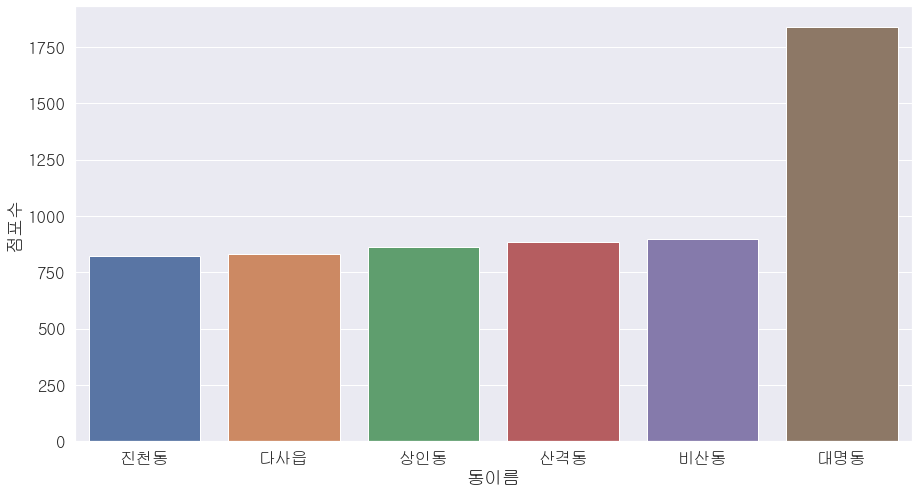

In [31]:
sns.set_style('dark')
sns.set(font_scale = 1.5)
rc('font', family=font_name)

plt.figure(figsize=(15,8))
this_barplot_options_count = {
    'data':df_food_district_count.sort_values('상권업종중분류명').tail(6),
    'x':'동이름',
    'y':'상권업종중분류명'
}


sns.barplot(**this_barplot_options_count)
plt.ylabel('점포수')